# Interpolowanie wielominau za pomocą Wielomianu Lagranga

In [89]:
import numpy as np
import numpy.polynomial.polynomial as poly
from matplotlib import pyplot as plt

In [134]:
# DANE
N = 5 # stopień wielomianu
X = np.array([0, 1, 3.5, 4, 5, 6]) # wartości x
Y = np.array([-120, 0, 1.40625, 0, 0, 120]) # wartości y
assert len(X) == len(Y) == N+1
assert len(np.unique(X)) == len(X)

In [135]:
def interpoluj(x, y, n):
    '''
    Wyznaczanie wielomianu n-tego stopnia na podstawie n+1 wartości x i y
    '''
    suma = (0)
    for i in range(n+1):
        iloczyn = (1)
        for j in range(n+1):
            if i == j:
                continue
            iloczyn = poly.polymul(iloczyn, (1/(x[i]-x[j]), -x[j]/(x[i]-x[j])))
        iloczyn *= y[i]
        suma= poly.polyadd(suma, iloczyn)
    return suma

In [136]:
wsp = interpoluj(X, Y, N)
wsp

array([   1.,  -15.,   85., -225.,  274., -120.])

In [143]:
def rysujWielomian(wsp, start, stop):
    '''
    Rysowanie wielomianu na podstawie jego współczynników
    Współczynniki w kolejności od największego wykładnika do współczynnika wyrazu wolnego
    '''
    def F(x, wsp):
        y = 0
        n = len(wsp)
        for i in range(n):
            y += wsp[n-i-1]*x**i
        return y

    x = np.linspace(start, stop)
    res=[]
    plt.plot(x, F(x, wsp))
    plt.yscale('symlog')
    plt.show()

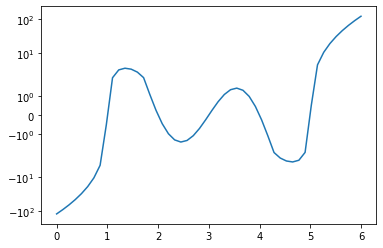

In [144]:
rysujWielomian(wsp, min(X), max(X))

Żrodła: 
* https://pl.wikipedia.org/wiki/Interpolacja_wielomianowa - Algorytm i część merytoryczna
* https://numpy.org/doc/stable/reference/routines.polynomials.html - dokumentacja biblioteki numpy i zawartej w niej implementacji wielomianów
* https://matplotlib.org/stable/api/index - dokumentacja biblioteki matplotlib
* https://stackoverflow.com/questions/37352098/plotting-a-polynomial-using-matplotlib-and-coeffiecients - rysowanie wykressu wielomianu